In [44]:
import os
from sklearn import datasets
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

figpath='../lectures/regression'

# Loading Boston housing data

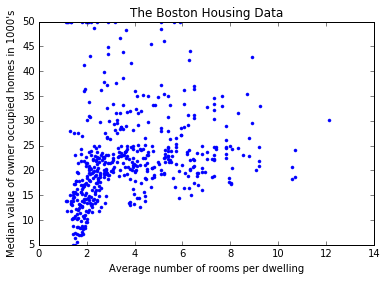

In [53]:
boston = datasets.load_boston()
plt.figure()
plt.plot(boston.data[:,7], boston.target,'.')
plt.ylabel('Median value of owner occupied homes in 1000\'s')
plt.xlabel('Average number of rooms per dwelling')
plt.title('The Boston Housing Data')
plt.savefig(os.path.join(figpath,'boston-22.pdf'))

# Examples of 3D plotting

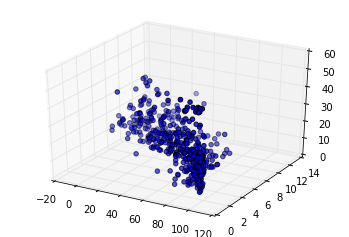

In [56]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(boston.data[:,6], boston.data[:,7], boston.target, marker='o')

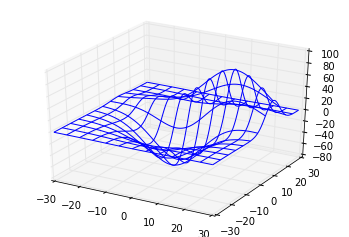

In [47]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.show()

# Quadratic error

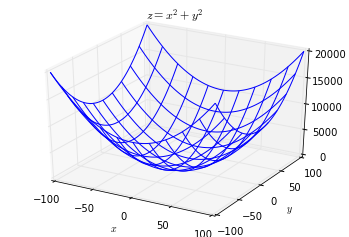

In [64]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-100,100,100)
y = np.linspace(-100,100,100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$z = x^2 + y^2$')
fig.savefig(os.path.join(figpath, 'quadratic-error.pdf'))
plt.show()

# Plane fitting

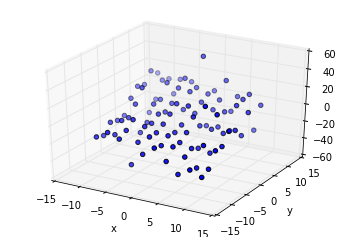

In [96]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-10,10,10)
y = np.linspace(-10,10,10)
X, Y = np.meshgrid(x, y)

# Equation of a plane
# A X + B Y + C Z + D = 0
A, B, C, D = 1, -2, 1, 3
mu, sigma = 0, 8
Z = np.random.normal(0,10,X.shape) + (- A * X - B * Y - D) / C

data_X = X
data_Y = Y
data_Z = Z

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1)
ax.scatter(X, Y, Z, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.savefig(os.path.join(figpath,'plane-fitting-data.pdf'))

(100, 3) (100, 1)


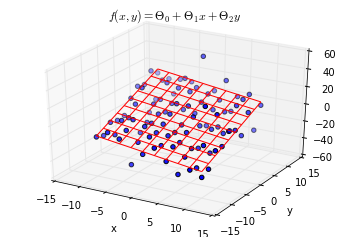

In [101]:
y = np.ravel(data_Y)
x = np.ravel(data_X)
z = np.ravel(data_Z)

X = np.vstack([np.ones(x.shape), x, y]).T
Y = np.vstack([z]).T
print X.shape, Y.shape

XtX = np.dot(X.T, X)
XtY = np.dot(X.T, Y)
theta = np.dot(np.linalg.inv(XtX), XtY)

x = np.linspace(-10,10,10)
y = np.linspace(-10,10,10)
X, Y = np.meshgrid(x, y)

Z_estimated = (theta[1] * X + theta[2] * Y + theta[0])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(data_X, data_Y, Z_estimated, rstride=1, cstride=1, color='r')
ax.scatter(X, Y, data_Z, marker='o')
plt.xlabel('x')
plt.ylabel('y')
plt.title('$f(x,y) = \Theta_0 + \Theta_1 x + \Theta_2  y$')
fig.savefig(os.path.join(figpath,'plane-fitting-data.pdf'))
plt.show()